In [16]:
import re
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import scienceplots

plt.style.use('science')

In [17]:
df = pd.read_csv("../data/results-service-vs-travel.csv")
df.head()

,n,idx,distribution,travel,serv,obj,iters,time,alg,cost_profile,scaling
0,15,0,0,0,0,1299.758,10000.0,14.331,dotsp,"(1, 2.5, 10)",0.4
1,15,0,0,0,1,2270.869,10000.0,14.302,dotsp,"(1, 2.5, 10)",0.4
2,15,1,0,0,0,1246.862,10000.0,13.963,dotsp,"(1, 2.5, 10)",0.4
3,15,1,0,0,1,2229.008,10000.0,13.703,dotsp,"(1, 2.5, 10)",0.4
4,15,10,0,0,0,1264.015,10000.0,11.177,dotsp,"(1, 2.5, 10)",0.4


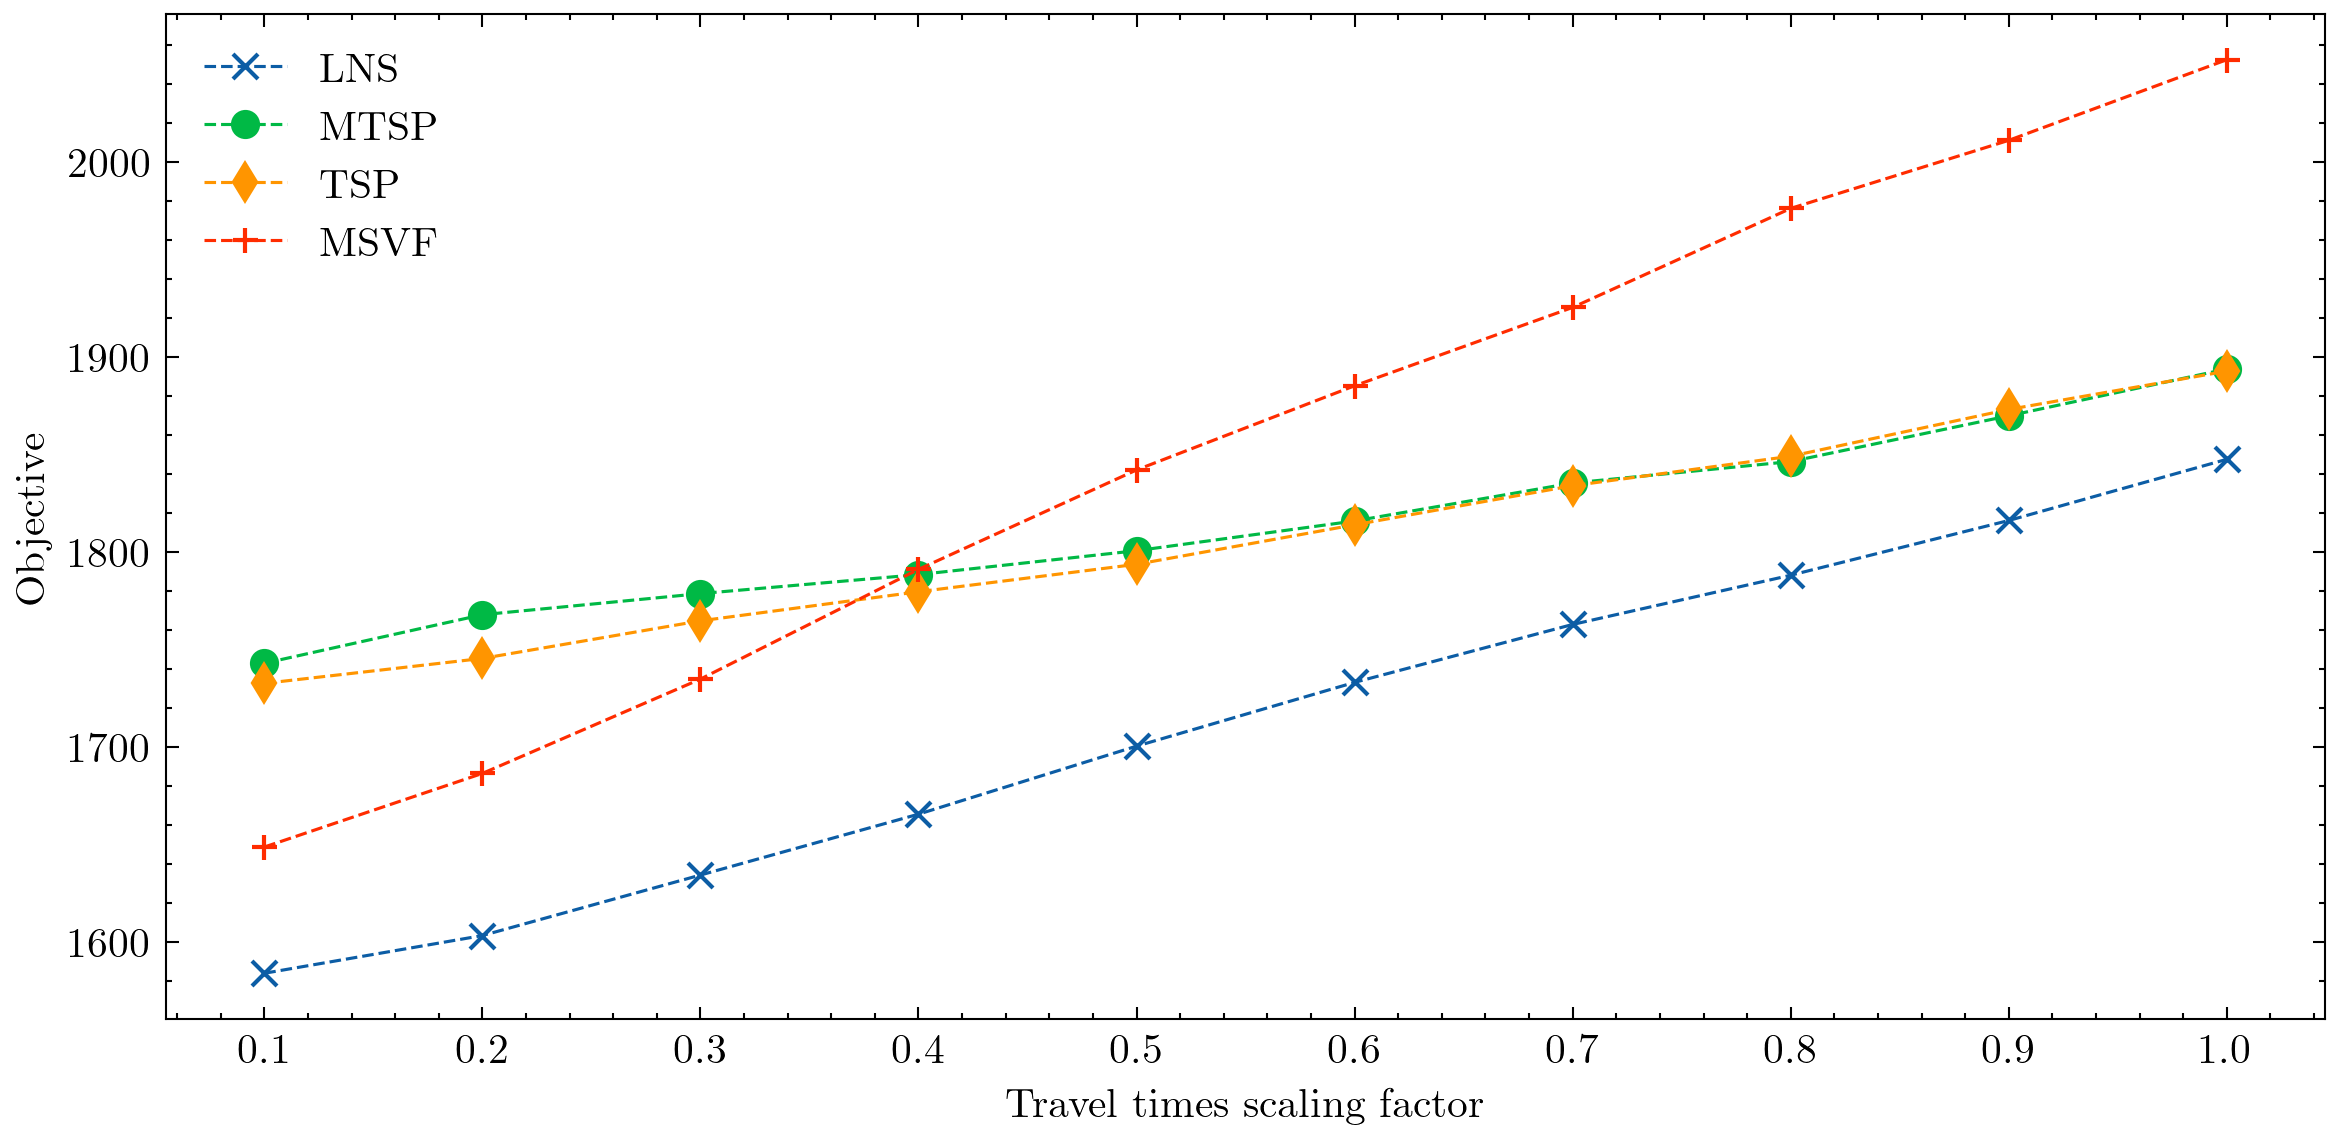

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=300)

markers = ['x', 'o', 'd', '+', '^']
res = df.groupby(['scaling', 'alg'])['obj'].mean().reset_index()

for idx, alg in enumerate(['lns', 'mtsp', 'dotsp', 'nnsvf']):
    data = res[res['alg'] == alg][['scaling', 'obj']]

    if alg == 'dotsp':
        alg = 'tsp'
    if alg == 'nnsvf':
        alg = 'msvf'
    ax.plot(data['scaling'], data['obj'], label=alg.upper(), marker=markers[idx], linestyle='--', linewidth=0.75)

ax.set_ylabel("Objective")
ax.set_xlabel("Travel times scaling factor")

plt.legend()
plt.xticks(np.linspace(0.1, 1, 10))

plt.tight_layout()  # Adjust the layout
plt.savefig("../figures/service-vs-travel.pdf", bbox_inches='tight')